# 인구소멸위기지억 - 시각화 (part3)

In [18]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [7]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [5]:
data_folder = "/content/mnt/MyDrive/data/인구소멸위기지역"

In [8]:
pop = pd.read_csv(f'{data_folder}/시군구_ID부여.csv', encoding='euc-kr')
print(pop.shape)
pop.head(260)

(250, 12)


,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸고위험지역,ID
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원)
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초
...,...,...,...,...,...,...,...,...,...,...,...,...
245,충청북도,증평군,9381,4077,6236,36893,19130,17763,0.653784,False,False,증평
246,충청북도,진천군,20447,9013,13290,81958,42893,39065,0.678179,False,False,진천
247,충청북도,청원구,58449,26661,23978,194256,99503,94754,1.111894,False,False,청주 청원
248,충청북도,충주시,47962,21293,40566,209084,105733,103351,0.524898,False,False,충주


## 지도 모양 보기

In [9]:
map_raw = pd.read_excel(f'{data_folder}/draw_korea_raw(2021).xlsx')
map_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [9]:
map_raw.stack()[:10] #행인덱스 열인덱스가 한줄로 만들어줌

0  7         철원
   8         화천
   9         양구
   10    고성(강원)
1  3         양주
   4        동두천
   5         연천
   6         포천
   7        의정부
   8         인제
dtype: object

In [10]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)

In [11]:
print(map.shape)
print(map.head())

(250, 3)
   level_0  level_1       0
0        0        7      철원
1        0        8      화천
2        0        9      양구
3        0       10  고성(강원)
4        1        3      양주


In [12]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [13]:
!cp $data_folder/draw_map.py .

In [14]:
ls -l


total 20
-rw------- 1 root root 5269 Sep  6 04:25 draw_map.py
drwx------ 5 root root 4096 Sep  6 04:03 mnt/
drwxr-xr-x 2 root root 4096 Sep  6 04:14 __pycache__/
drwxr-xr-x 1 root root 4096 Sep  1 19:26 sample_data/


In [15]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus


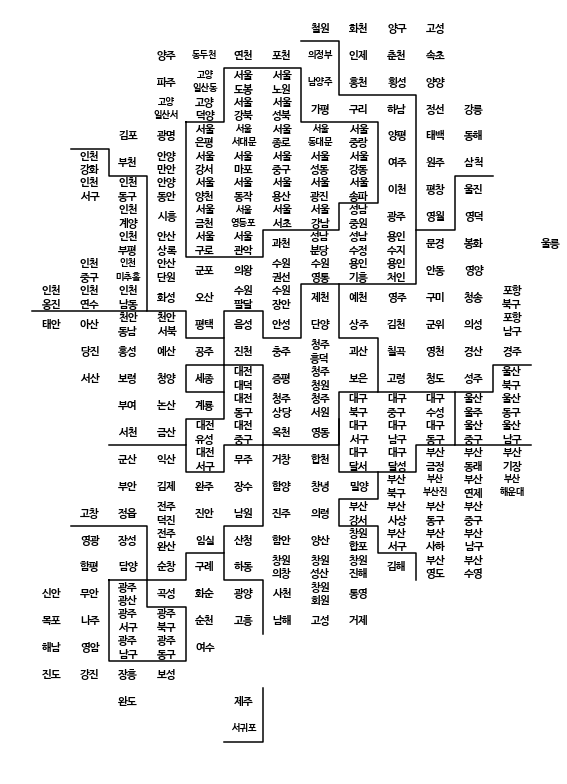

In [16]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in map.iterrows():

    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'  #서울 종로를 두줄로 만듦
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

#글씨쓰기
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [17]:
pop = pd.merge(pop, map, how='left', on='ID')
print(pop.shape)
pop.head()

(250, 14)


,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸고위험지역,ID,y,x
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉,3,11
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원),0,10
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해,4,11
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척,5,11
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초,1,10


In [18]:
#null 데이터 있는지 확인
pop.isnull().sum().sum()

0

## 인구 현황 및 인구 소멸위기 지역 확인

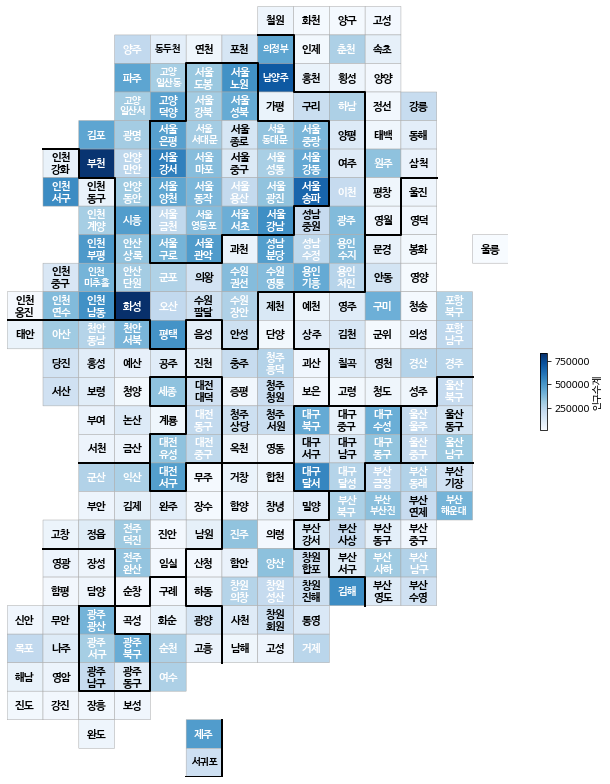

In [19]:
drawKorea('인구수계', pop, 'Blues')


##  인구소멸위기지역

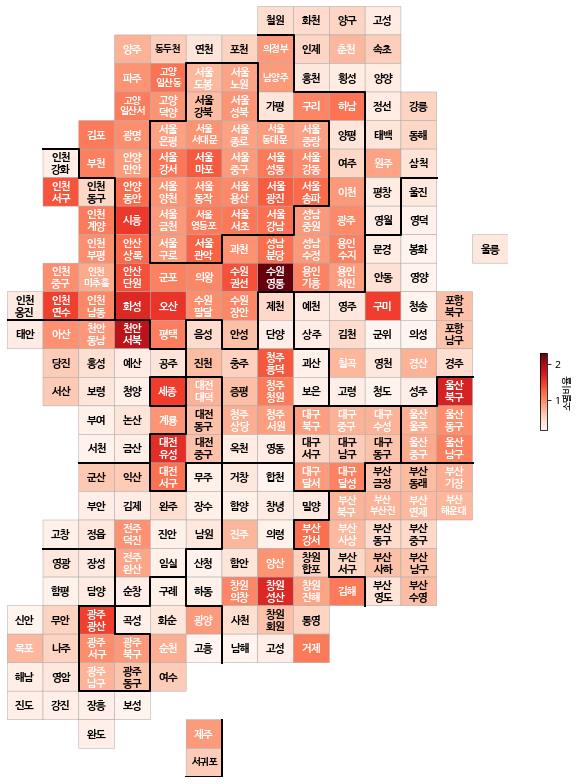

In [20]:
drawKorea('소멸비율', pop, 'Reds')

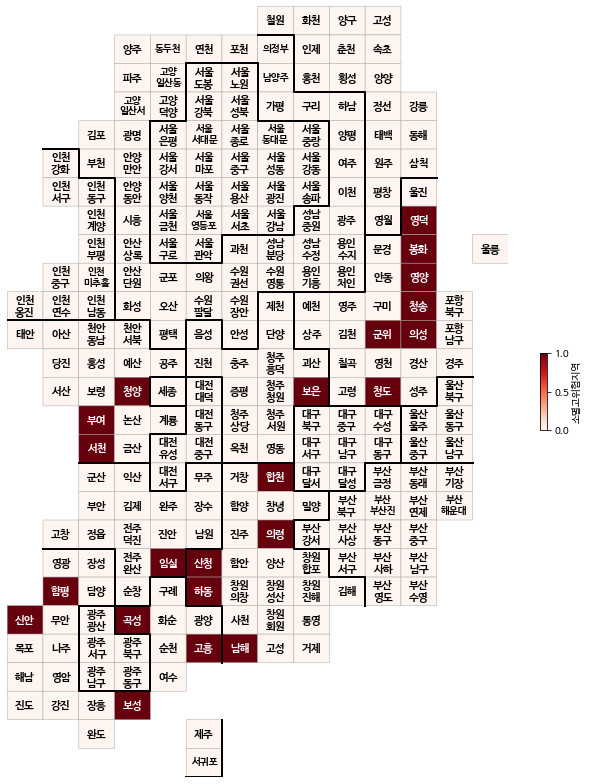

In [22]:
#위는 잘 모르겟음

pop['소멸고위험지역'] = pop.소멸고위험지역.astype(int)
drawKorea('소멸고위험지역', pop, 'Reds')

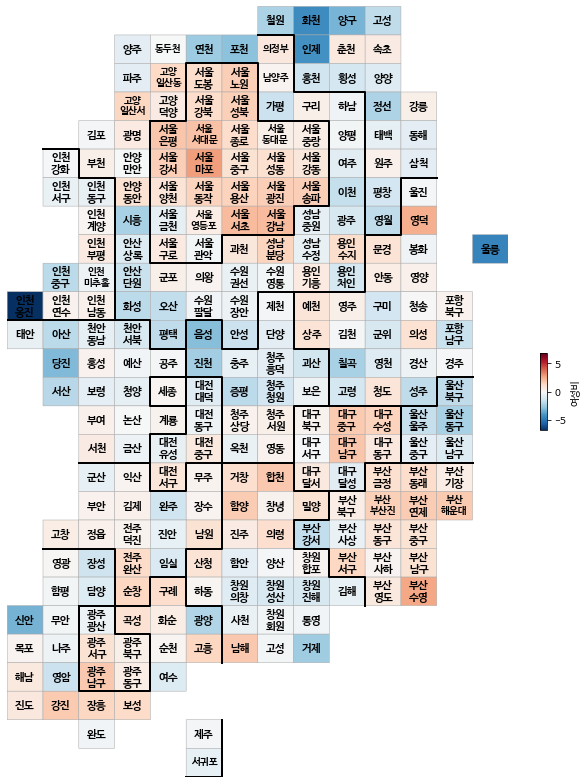

In [25]:
# 여성인구 확인
pop['여성비'] = (pop['인구수여자'] / pop['인구수계'] - 0.5) *100  #절반보다 작으면 
drawKoreaMinus('여성비', pop, 'RdBu_r')

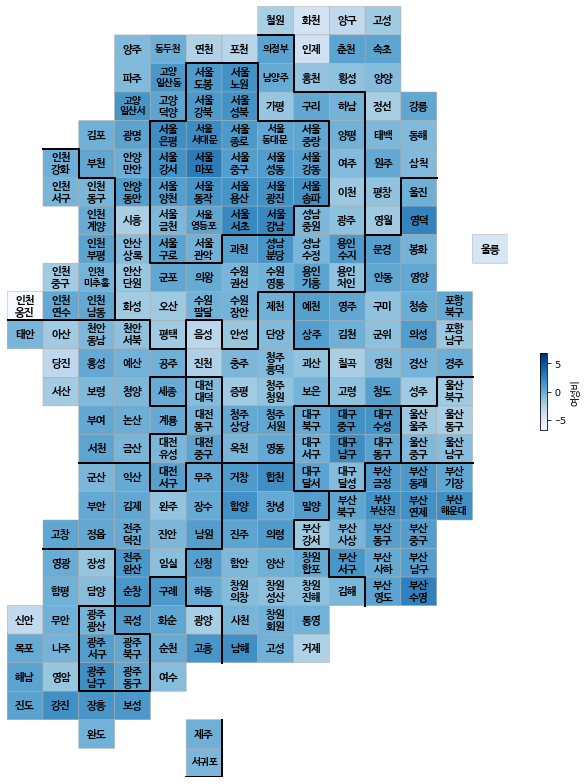

In [31]:
# 20 30 여성비
pop['2030여성비'] = (pop['20~39세여자'] / pop['20~39세계'] - 0.5) * 100
drawKoreaMinus('여성비', pop, 'Blues')

In [32]:
import folium
import json

In [ ]:
pop.set_index('ID', inplace=True)


In [36]:
pop.head(2)

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸고위험지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,,
강릉,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,0,3,11,0.376341,-3.608050
고성(강원),강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,0,0,10,-1.746790,-10.858731


In [38]:
geo_data = json.load(open(f'{data_folder}/skorea_municipalities_geo_simple.json'))

map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(
    geo_data=geo_data,
    data=pop.인구수계,
    columns=(pop.index, pop.인구수계),
    key_on='feature.id',
    fill_color='YlGnBu',
    legend_name='인구수'
).add_to(map)

title = '<h3 align="center" style="font-size:20px">기초자치단체별 인구수</h3>'
map.get_root().html.add_child(folium.Element(title))
map

In [39]:
geo_data = json.load(open(f'{data_folder}/skorea_municipalities_geo_simple.json'))

map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(
    geo_data=geo_data,
    data=pop.소멸위기지역,
    columns=(pop.index, pop.소멸위기지역),
    key_on='feature.id',
    fill_color='Reds',
    legend_name='인구수'
).add_to(map)

title = '<h3 align="center" style="font-size:20px">기초자치단체별 인구수</h3>'
map.get_root().html.add_child(folium.Element(title))
map